# MNIST Digit Recognition

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Import dataset
data = pd.read_csv('train.csv')

In [20]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0: 1000].T
Y_test = data_test[0]
X_test = data_test[1: n]
X_test = X_test / 255.

data_train = data[1000: m].T
Y_train = data_train[0]
X_train = data_train[1: n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [22]:
Y_train

array([1, 3, 1, ..., 8, 3, 0], dtype=int64)

In [23]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(A1, Z1, A2, Z2, w1, w2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * ReLU(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [26]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(A1, Z1, A2, Z2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print('Iteration:', i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return w1, b1, w2, b2

In [27]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[8 6 5 ... 4 6 4] [1 3 1 ... 8 3 0]
0.09609756097560976
Iteration: 10
[8 6 8 ... 6 6 1] [1 3 1 ... 8 3 0]
0.18746341463414634
Iteration: 20
[8 1 1 ... 6 1 1] [1 3 1 ... 8 3 0]
0.2552926829268293
Iteration: 30
[8 6 1 ... 6 1 7] [1 3 1 ... 8 3 0]
0.30502439024390243
Iteration: 40
[8 6 1 ... 6 1 0] [1 3 1 ... 8 3 0]
0.35280487804878047
Iteration: 50
[8 6 2 ... 8 1 0] [1 3 1 ... 8 3 0]
0.41424390243902437
Iteration: 60
[8 6 1 ... 8 1 0] [1 3 1 ... 8 3 0]
0.5050975609756098
Iteration: 70
[8 6 1 ... 8 1 0] [1 3 1 ... 8 3 0]
0.5842682926829268
Iteration: 80
[8 1 1 ... 8 1 0] [1 3 1 ... 8 3 0]
0.6276829268292683
Iteration: 90
[8 1 1 ... 8 1 0] [1 3 1 ... 8 3 0]
0.6592439024390244
Iteration: 100
[8 1 1 ... 3 3 0] [1 3 1 ... 8 3 0]
0.707780487804878
Iteration: 110
[8 5 1 ... 0 3 0] [1 3 1 ... 8 3 0]
0.5693170731707317
Iteration: 120
[8 1 1 ... 3 3 0] [1 3 1 ... 8 3 0]
0.7531951219512195
Iteration: 130
[8 1 1 ... 3 3 0] [1 3 1 ... 8 3 0]
0.7679512195121951
Iteration: 140
[8 1 1 ... 3

~86% accuracy on training data.

In [28]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print('Prediction: ', prediction)
    print('Label: ', label)

    current_image = current_image.reshape((28, 28)) * 225
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at the couple of examples:

Prediction:  [1]
Label:  1


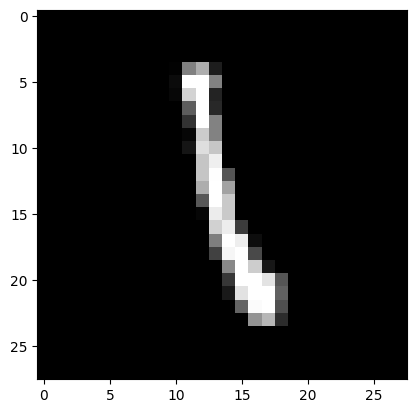

Prediction:  [5]
Label:  3


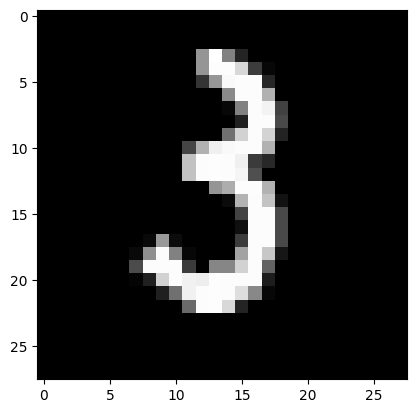

Prediction:  [1]
Label:  1


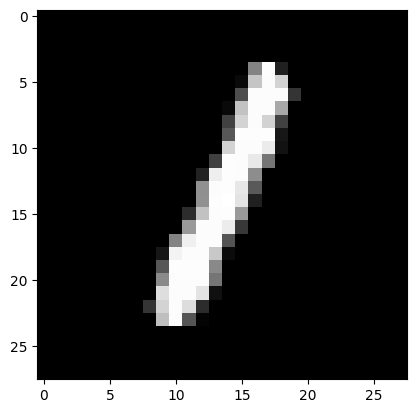

Prediction:  [6]
Label:  6


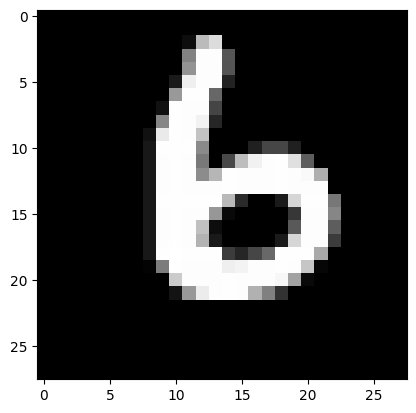

In [29]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [31]:
test_data_predictions = make_predictions(X_test, w1, b1, w2, b2)
get_accuracy(test_data_predictions, Y_test)

[2 3 6 7 0 7 8 1 1 0 9 0 0 3 2 4 2 9 1 2 2 4 6 4 1 5 4 1 1 9 0 5 7 5 7 9 3
 5 1 6 1 6 7 5 5 8 6 5 3 2 0 4 3 1 7 7 5 1 4 9 6 4 7 7 8 4 9 3 8 6 0 8 4 3
 7 4 8 1 4 8 4 7 6 7 1 6 5 2 1 9 8 9 1 8 8 9 7 0 4 0 9 7 1 4 3 7 6 3 7 8 4
 4 4 5 9 3 8 8 8 6 8 3 9 1 6 9 5 9 0 9 7 4 4 0 6 9 1 7 5 3 3 4 7 1 0 7 8 0
 5 4 6 2 0 7 5 9 5 0 5 3 5 4 5 3 8 6 6 1 1 0 0 5 6 8 4 7 5 9 2 6 8 8 8 6 6
 2 6 0 1 0 6 4 8 6 7 3 1 6 2 6 1 9 7 3 7 8 2 7 3 2 2 3 3 0 1 2 6 7 4 2 8 9
 9 6 1 7 0 5 6 3 8 5 1 6 1 7 3 6 5 0 6 4 2 4 7 4 2 2 2 7 0 2 2 6 2 9 1 0 9
 1 8 4 8 7 7 5 7 2 3 6 9 8 8 0 0 5 3 8 5 7 6 4 5 9 9 3 8 7 7 0 4 2 2 7 2 7
 8 3 6 6 5 5 1 1 8 4 1 6 1 4 1 9 0 5 8 6 3 5 1 1 6 4 7 4 4 0 4 1 2 4 5 0 6
 1 6 9 6 4 9 3 5 0 2 8 8 0 1 6 2 4 4 9 8 8 2 3 4 6 1 6 4 1 0 6 4 2 8 9 6 0
 8 5 5 8 8 5 0 5 9 5 7 5 3 1 1 8 9 4 4 8 0 4 3 6 8 3 1 0 8 1 2 1 5 1 1 0 6
 6 9 3 3 9 4 5 3 0 7 8 2 5 7 0 2 4 4 9 4 3 1 2 1 9 8 0 9 3 1 4 4 1 3 5 9 8
 3 1 2 7 1 1 7 8 7 2 5 3 2 1 2 1 0 5 1 9 9 5 7 6 3 1 3 0 3 9 4 9 7 0 3 6 1
 0 9 3 3 4 8 1 1 6 1 7 0 

0.86

Still 86% accuracy, so our model generalized from the training data pretty well... :)